#Import necessary libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

#Load the dataset and display it

In [60]:
cust_data = pd.read_csv("/content/Customer_Behaviour.csv")
cust_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [61]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [62]:
cust_data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [63]:
cust_data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [64]:
cust_data.shape

(400, 5)

#Check for missing data

In [65]:
cust_data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

As seen from the above output, there is no missing data in the dataset.

#Display columns

In [66]:
cust_data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

#Identify categorical columns and convert it into numeric using Label Encoder.

In [67]:
categorical_col = ['Gender']
le = LabelEncoder()
for col in categorical_col:
  cust_data[col] = le.fit_transform(cust_data[col])
cust_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


#Split the dataset into features and target

In [68]:
X = cust_data.drop(columns = 'Purchased')
y = cust_data['Purchased']

In [69]:
X

,User ID,Gender,Age,EstimatedSalary
0,15624510,1,19,19000
1,15810944,1,35,20000
2,15668575,0,26,43000
3,15603246,0,27,57000
4,15804002,1,19,76000
...,...,...,...,...
395,15691863,0,46,41000
396,15706071,1,51,23000
397,15654296,0,50,20000
398,15755018,1,36,33000


In [70]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

#Plotting a correlation heatmap to identify and display the relationship between the features.

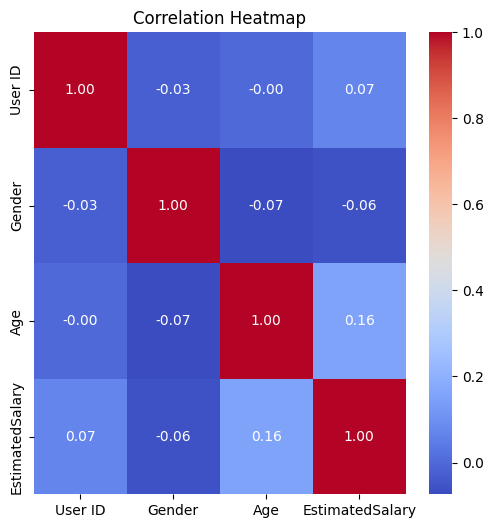

In [71]:
plt.figure(figsize=(6, 6))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#Scale (or normalize) the features using StandardScaler

In [72]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Split the dataset into training and testing

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 66)

#Initialize and fit the model using the training data

In [74]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

#Make predictions on the test data

In [75]:
y_pred = model.predict(X_test)

#Verify whether the predicted and actual data are of the same size

In [76]:
y_pred.size

120

In [77]:
y_test.size

120

#Create a new dataset to compare the actual and predicted values

In [78]:
new_data = {"Actual values": y_test, "Predicted values": y_pred}
new_df = pd.DataFrame(new_data)
new_df

,Actual values,Predicted values
189,0,0
292,1,1
140,0,0
97,1,0
207,0,1
...,...,...
376,0,1
237,0,0
57,0,0
81,0,0


#Calculate and display the model accuracy and confusion matrix

In [79]:
model_accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy is:",model_accuracy*100)

Model accuracy is: 87.5


In [80]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n",conf_matrix)

Confusion matrix:
 [[72  6]
 [ 9 33]]


#Plotting a confusion matrix heatmap to display the actual and predicted values in a better way.

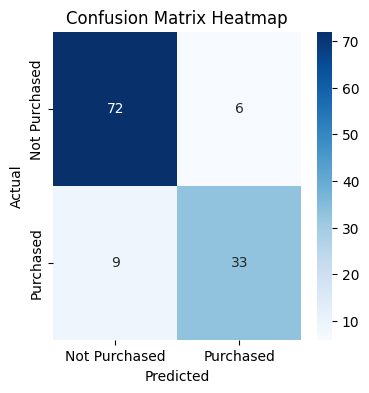

In [82]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()